# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries
import os
import cv2
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras import layers, models

import sklearn
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import zipfile
from zipfile import ZipFile, BadZipFile
from collections import Counter
import random
from sklearn.utils import shuffle
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

2025-04-22 21:10:52.359753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745356252.557104    1247 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745356252.612679    1247 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Load the dataset.

In [3]:
# Dataset path (already extracted)
dataset_path = '/kaggle/input/assigment-data/data'

In [4]:
# Utility to load image
def load_image(file_path):
    try:
        return np.array(Image.open(file_path).convert('RGB'))
    except Exception as e:
        print(f"Error loading image {file_path}: {e}")
        return None

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
# Create a function to load the raw images



In [6]:
# Load image utility
def load_image(file_path):
    try:
        return np.array(Image.open(file_path).convert('RGB'))
    except:
        return None

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [7]:
# Load dataset
def load_dataset(dataset_path):
    images = []
    labels = []
    for label_name in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label_name)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                if file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    img = load_image(file_path)
                    if img is not None:
                        images.append(img)
                        labels.append(label_name)
    return np.array(images), np.array(labels), np.unique(labels)

In [8]:
images, labels, class_names = load_dataset(dataset_path)

In [9]:
# Get the images and their labels


print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")
print(f"Class names: {class_names}")
print(f"Image array shape: {images.shape}")

Total images: 7625
Total labels: 7625
Class names: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Image array shape: (7625, 256, 256, 3)


In [10]:
count_labels = Counter(labels)
for l,c in count_labels.items(): 
    print(l,":",c,"images")

Metal : 1000 images
Glass : 750 images
Other : 1010 images
Paper : 1030 images
Food_Waste : 1000 images
Cardboard : 540 images
Plastic : 2295 images


Perform any operations, if needed, on the images and labels to get them into the desired format.

Verification if images are correctly unzipped and images are correct

##### Displays a sample image from each class in your dataset. It goes through all the classes, selects a random image from each class, and shows that image with the class label as the title

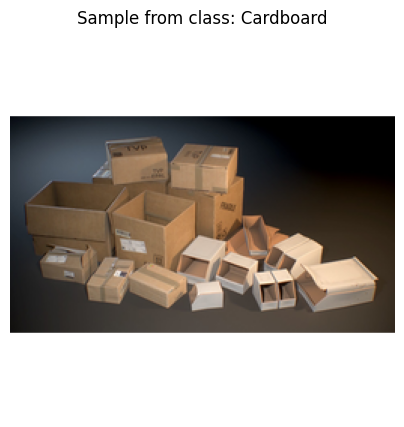

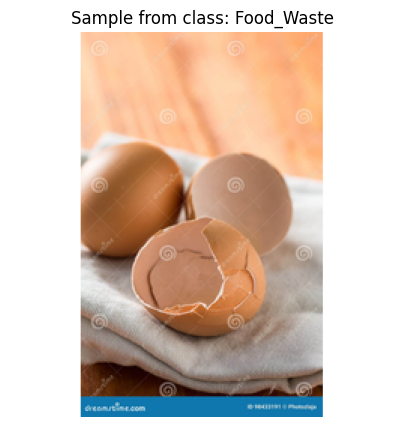

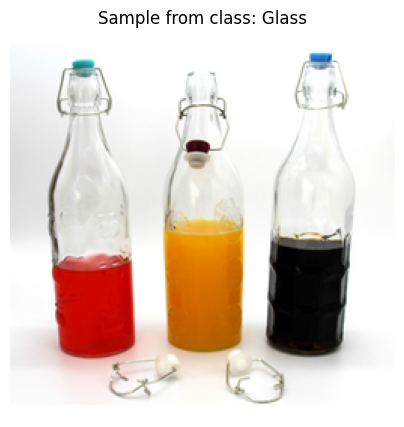

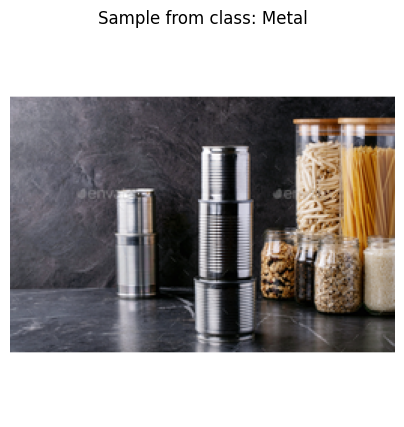

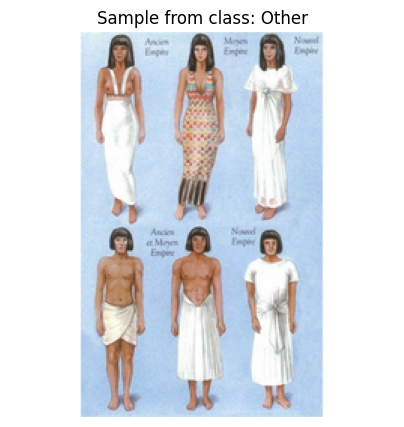

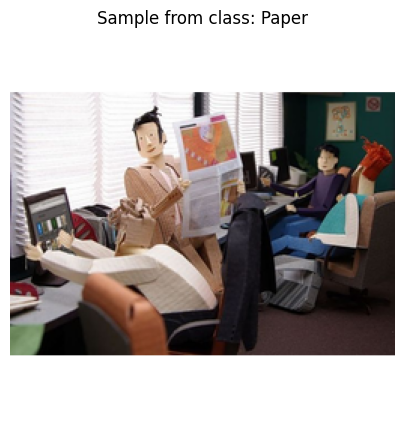

In [ ]:
# Print sample image from each class
for class_name in class_names:
    class_indices = [i for i, label in enumerate(labels) if label == class_name]
    sample_index = random.choice(class_indices)  # Randomly pick an image index from this class
    sample_image = images[sample_index]
    
    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(sample_image)
    plt.title(f"Sample from class: {class_name}")
    plt.axis('off')  # Hide axis
    plt.show()

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

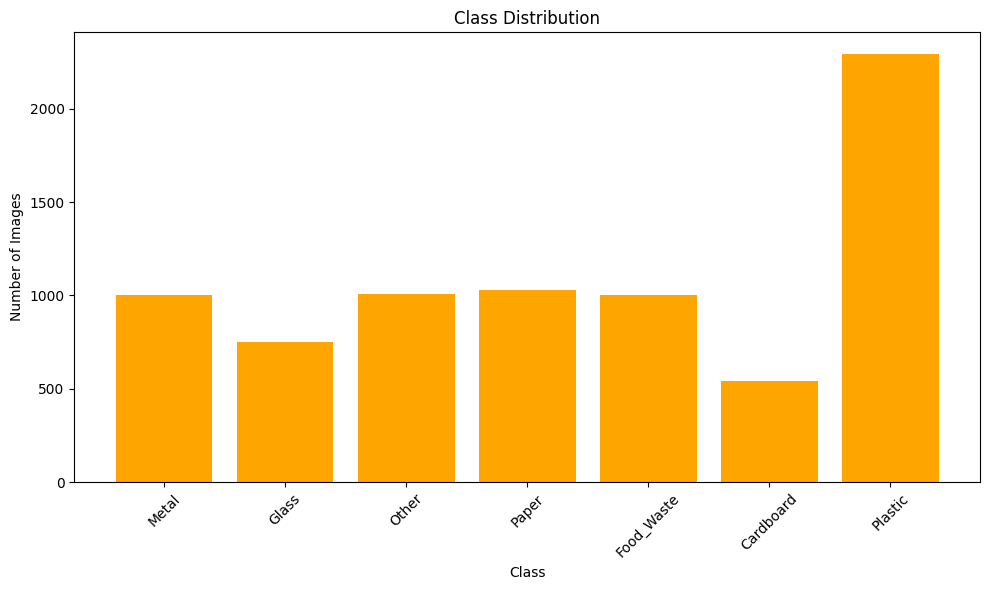

In [12]:
# Visualise Data Distribution


### using Counter to get count

count_labels = Counter(labels)

### Get the class names and their corresponding counts

class_names = list(count_labels.keys())
class_counts = list(count_labels.values()) 

### Creating bar plot 
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='orange')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)  # Rotate class names for better readability
plt.tight_layout()  # Adjust the layout to fit labels
plt.show()

## Observation: 

- plastic is the most common with 2000+ images
- Paper, Food Waste, Metal, and Other have similar distribution 
- Cardboard, Glass have the least no of samples 
- Dataset is slightly unbalanced 

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

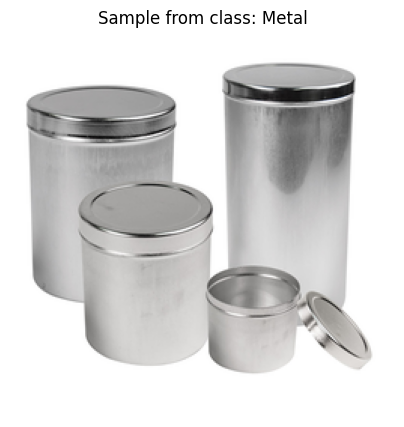

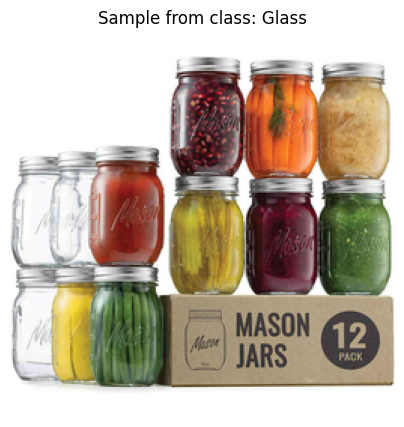

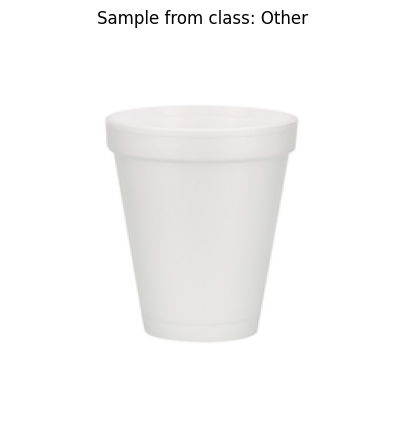

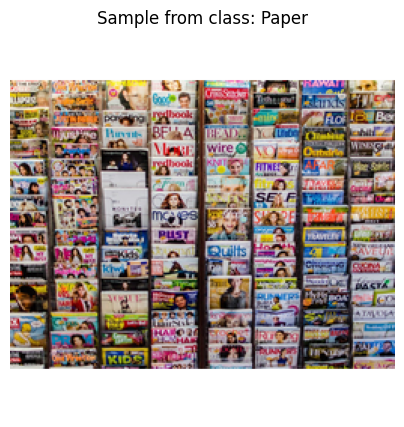

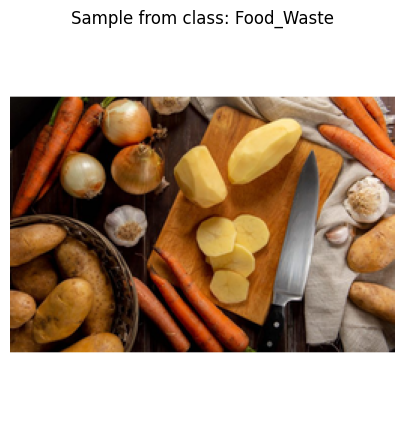

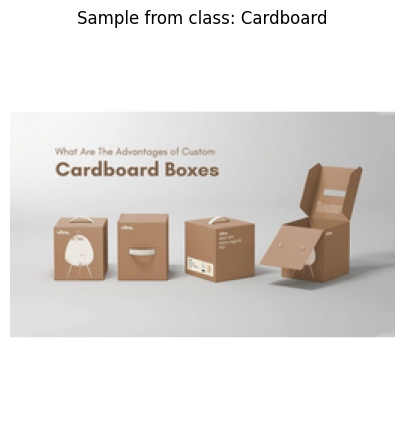

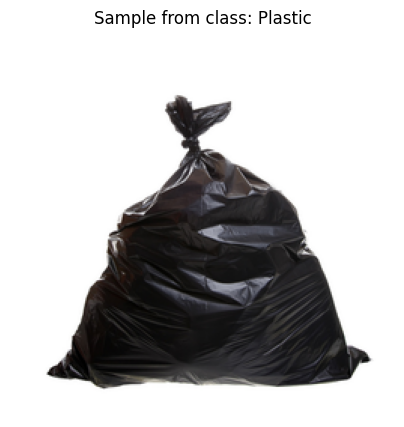

In [13]:
# Visualise Sample Images (across different labels)

# Print sample image from each class
for class_name in class_names:
    class_indices = [i for i, label in enumerate(labels) if label == class_name]
    sample_index = random.choice(class_indices)  # Randomly pick an image index from this class
    sample_image = images[sample_index]
    
    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(sample_image)
    plt.title(f"Sample from class: {class_name}")
    plt.axis('off')  # Hide axis
    plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [14]:
# Find the smallest and largest image dimensions from the data set

def find_image_dim(images): 
    min_width = float("inf")
    min_height = float('inf')
    
    max_width = 0 
    max_height = 0 
    
    ### Looping thru all the images and checking 
    
    for img in images:
        height, width, _ = img.shape
        
        
        # Update the minimum dimensions
        if width < min_width:
            min_width = width
        if height < min_height:
            min_height = height
        
        # Update the maximum dimensions
        if width > max_width:
            max_width = width
        if height > max_height:
            max_height = height

    return (min_width, min_height), (max_width, max_height)

min_dims, max_dims = find_image_dim(images)

print("Smallest Image Dimensions (Width x Height):", min_dims)
print("Largest Image Dimensions (Width x Height):", max_dims)
        

Smallest Image Dimensions (Width x Height): (256, 256)
Largest Image Dimensions (Width x Height): (256, 256)


In [15]:

def resize_images_pil(images, size=(224, 224)):
    resized = [np.array(Image.fromarray(img).resize(size)) for img in images]
    return np.array(resized)



In [16]:
images = images.astype(np.uint8)
resized_images = resize_images_pil(images, size=(224, 224))

In [17]:
# Check resized images
for i, img in enumerate(resized_images[:10]):  # Display first 10 images to check
    print(f"Image {i} shape: {img.shape}")

Image 0 shape: (224, 224, 3)
Image 1 shape: (224, 224, 3)
Image 2 shape: (224, 224, 3)
Image 3 shape: (224, 224, 3)
Image 4 shape: (224, 224, 3)
Image 5 shape: (224, 224, 3)
Image 6 shape: (224, 224, 3)
Image 7 shape: (224, 224, 3)
Image 8 shape: (224, 224, 3)
Image 9 shape: (224, 224, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [18]:
from tensorflow.keras.utils import to_categorical
# Step 1: Label Encoding (convert categorical labels to integers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)  # Transform labels into integers

# Step 2: One-Hot Encoding (convert integer labels to one-hot encoded)
y_categorical = to_categorical(y_encoded)

# Optional: Check the first 10 encoded labels and their one-hot encoding
print("Encoded labels:", y_encoded[:10])  # Display first 10 encoded labels
print("Categorical labels shape:", y_categorical.shape)  # Display the shape of one-hot encoded labels


Encoded labels: [3 3 3 3 3 3 3 3 3 3]
Categorical labels shape: (7625, 7)


In [19]:
y_encoded

array([3, 3, 3, ..., 6, 6, 6])

In [20]:
y_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
y_categorical.shape

(7625, 7)

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [22]:
# Assign specified parts of the dataset to train and validation sets

## Shufflin the dataset 
resized_images, y_categorical = shuffle(resized_images, y_categorical, random_state=42)


# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    resized_images, y_categorical,
    test_size=0.25,
    random_state=42,
    stratify=y_encoded  # Stratify to ensure proper class distribution
)

# Normalize image data (convert to float and scale to [0, 1])
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

In [23]:

X_train.shape

(5718, 224, 224, 3)

In [24]:
y_train.shape

(5718, 7)

In [25]:
X_val.shape

(1907, 224, 224, 3)

In [26]:
y_val.shape

(1907, 7)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [28]:
# Build and compile the model

num_classes = y_train.shape[1]
input_shape = X_train.shape[1:]

model1 = models.Sequential([
    # Conv Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Conv Layer 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Conv Layer 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Softmax for classification
])



In [29]:
# Compile the model
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,940,231 (49.36 MB)

 Trainable params: 12,939,783 (49.36 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

## Defining metrics and callbacks for reusability

In [31]:
# Define metrics
metrics = ['accuracy', AUC()]

# Define callbacks
def get_callbacks():
    early_stopping = EarlyStopping(
        monitor='val_loss',    # You can also use 'val_accuracy' if preferred
        patience=20,
        restore_best_weights=True
    )

    model_checkpoint = ModelCheckpoint(
        'best_model.keras',       # File path to save the best model
        monitor='val_accuracy',  # Save based on validation accuracy
        save_best_only=True,
        mode='max'
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',    # Can also monitor 'val_accuracy'
        factor=0.5,            # Reduce learning rate by a factor of 0.5
        patience=3,            # Wait for 3 epochs without improvement
        min_lr=1e-6            # Lower bound for learning rate
    )

    return [early_stopping, model_checkpoint, reduce_lr]

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [32]:
history_1 = model1.fit(
    X_train, y_train, 
    batch_size=32, epochs=32, 
    validation_data=(X_val, y_val),
    callbacks=get_callbacks()  # You can add your callbacks for early stopping, etc.
)

Epoch 1/32


I0000 00:00:1745356402.508443    1284 service.cc:148] XLA service 0x7a5694013870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745356402.509081    1284 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745356402.973422    1284 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/179 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.2075 - loss: 26.9714

I0000 00:00:1745356409.430386    1284 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 103ms/step - accuracy: 0.2578 - loss: 10.3932 - val_accuracy: 0.1741 - val_loss: 9.7176 - learning_rate: 0.0010
Epoch 2/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.3064 - loss: 1.9377 - val_accuracy: 0.2396 - val_loss: 3.3931 - learning_rate: 0.0010
Epoch 3/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.2925 - loss: 1.9281 - val_accuracy: 0.2837 - val_loss: 2.1419 - learning_rate: 0.0010
Epoch 4/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.2964 - loss: 1.8705 - val_accuracy: 0.2952 - val_loss: 1.8768 - learning_rate: 0.0010
Epoch 5/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.2959 - loss: 1.8641 - val_accuracy: 0.2999 - val_loss: 1.8564 - learning_rate: 0.0010
Epoch 6/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.3050 - loss: 1.8598 - val_accuracy: 0.2979 - val_loss: 1.8854 - learning_rate: 0.0010
Epoch 7/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.2958 - loss: 1.8740 - v

In [33]:
input_shape = (224, 224, 3)
num_classes = y_train.shape[1]

# Load MobileNetV2 base
base_model = MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights= None
)
base_model.trainable = False  # Freeze feature extractor

In [36]:
inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model2 = Model(inputs, outputs)

In [37]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)


In [39]:
history = model2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=27,
    validation_data=(X_val, y_val),
    callbacks=[lr_callback]
)

Epoch 1/27
179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 113ms/step - accuracy: 0.2845 - loss: 1.9358 - val_accuracy: 0.3047 - val_loss: 1.9090 - learning_rate: 0.0010
Epoch 2/27
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.3028 - loss: 1.9020 - val_accuracy: 0.3047 - val_loss: 1.8842 - learning_rate: 0.0010
Epoch 3/27
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.3006 - loss: 1.8823 - val_accuracy: 0.3047 - val_loss: 1.8682 - learning_rate: 0.0010
Epoch 4/27
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.2954 - loss: 1.8665 - val_accuracy: 0.3047 - val_loss: 1.8581 - learning_rate: 0.0010
Epoch 5/27
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.3180 - loss: 1.8452 - val_accuracy: 0.3047 - val_loss: 1.8526 - learning_rate: 0.0010
Epoch 6/27
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3006 - loss: 1.8543 - val_accuracy: 0.3047 - val_loss: 1.8495 - learning_rate: 0.0010
Epoch 7/27
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.2923 - loss: 

In [40]:
# Fine-tuning phase
base_model.trainable = True
model2.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[lr_callback]
)

Epoch 1/10


E0000 00:00:1745356982.428633    1283 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745356982.625458    1283 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


178/179 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2723 - loss: 1.9529

E0000 00:00:1745357016.842200    1284 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745357017.041493    1284 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


179/179 ━━━━━━━━━━━━━━━━━━━━ 105s 236ms/step - accuracy: 0.2723 - loss: 1.9524 - val_accuracy: 0.3047 - val_loss: 1.8470 - learning_rate: 1.0000e-05
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.2841 - loss: 1.8352 - val_accuracy: 0.3047 - val_loss: 1.8496 - learning_rate: 1.0000e-05
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.2934 - loss: 1.8063 - val_accuracy: 0.3047 - val_loss: 1.8540 - learning_rate: 1.0000e-05
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2813 - loss: 1.7894
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.2814 - loss: 1.7893 - val_accuracy: 0.3047 - val_loss: 1.8602 - learning_rate: 1.0000e-05
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.3047 - loss: 1.7599 - val_accuracy: 0.3047 - val_loss: 1.8681 - learning_rate: 5.0000e-06
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

# Insights from the Dataset

1. The dataset consists of images sorted into seven categories: Metal, Other, Glass, Food Waste, Paper, Plastic, and Cardboard.

2. Analysis of class distribution reveals a significant imbalance — with Plastic being the most represented category, while Cardboard appears the least.

3. Such class imbalance can skew the model's predictions in favor of the more dominant categories like Plastic.

4. To help mitigate this issue, data augmentation techniques were implemented.

5. Some categories, particularly Food Waste and Plastic, exhibit a wide range of visual diversity, making classification more challenging.

6. Additionally, classes with similar visual features (e.g., Plastic and Glass) may lead to confusion due to shared textures and colors.

7. Differences in image resolution, lighting, and quality may also introduce noise, potentially hindering model accuracy.

# Model Training Overview

1. The model development process involved initially training a CNN from scratch, followed by using a pre-existing architecture, and finally incorporating data augmentation methods.

2. To retain more image details, all images were resized to dimensions before being fed into the model.

